In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import xarray as xr
import xesmf as xe

method_list = [
    "bilinear",
    "conservative",
    "conservative_normed",
    "nearest_s2d",
    "nearest_d2s",
    "patch",
]

In [2]:
ds_in = xe.util.grid_global(20, 15)  # input grid
ds_fine = xe.util.grid_global(4, 4)  # high-resolution target grid
ds_coarse = xe.util.grid_global(300, 200)  # low-resolution target grid

/home/czhou/anaconda3/envs/py311/lib/python3.11/site-packages/xesmf/util.py:157: UserWarning: 360 cannot be divided by d_lon = 300, might not cover the globe uniformly
  warnings.warn(
/home/czhou/anaconda3/envs/py311/lib/python3.11/site-packages/xesmf/util.py:163: UserWarning: 180 cannot be divided by d_lat = 200, might not cover the globe uniformly
  warnings.warn(


Make a wave field that is widely used in regridding benchmarks.
- xe.data.wave_smooth(lon, lat) is a helper function provided by xESMF.
- It generates a smooth, wavy function of longitude and latitude (basically a fake “toy dataset”).


In [3]:
ds_in["data"] = xe.data.wave_smooth(ds_in["lon"], ds_in["lat"])
ds_in

<xarray.Dataset> Size: 9kB
Dimensions:  (y: 12, x: 18, y_b: 13, x_b: 19)
Coordinates:
    lon      (y, x) float64 2kB -170.0 -150.0 -130.0 ... 130.0 150.0 170.0
    lat      (y, x) float64 2kB -82.5 -82.5 -82.5 -82.5 ... 82.5 82.5 82.5 82.5
    lon_b    (y_b, x_b) float64 2kB -180.0 -160.0 -140.0 ... 140.0 160.0 180.0
    lat_b    (y_b, x_b) float64 2kB -90.0 -90.0 -90.0 -90.0 ... 90.0 90.0 90.0
Dimensions without coordinates: y, x, y_b, x_b
Data variables:
    data     (y, x) float64 2kB 2.016 2.009 1.997 1.987 ... 1.997 2.009 2.016

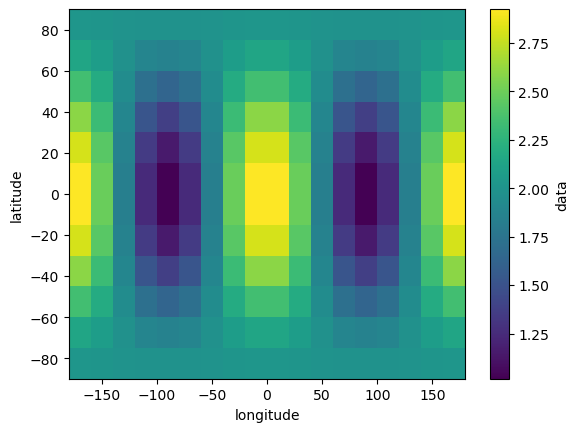

In [7]:
ds_in["data"].plot(x="lon", y="lat", cmap="viridis")

In [8]:
def regrid(ds_in, ds_out, dr_in, method):
    """Convenience function for one-time regridding"""
    regridder = xe.Regridder(ds_in, ds_out, method, periodic=True)
    dr_out = regridder(dr_in)
    return dr_out

In [9]:
for method in method_list:
    print(method)
    %time ds_fine[method] = regrid(ds_in, ds_fine, ds_in['data'], method)
    print('')

bilinear
CPU times: user 636 ms, sys: 72.3 ms, total: 708 ms
Wall time: 706 ms

conservative
CPU times: user 69.7 ms, sys: 3.79 ms, total: 73.5 ms
Wall time: 73.5 ms

conservative_normed
CPU times: user 72.1 ms, sys: 39 μs, total: 72.1 ms
Wall time: 72.1 ms

nearest_s2d
CPU times: user 16.8 ms, sys: 81 μs, total: 16.9 ms
Wall time: 16.9 ms

nearest_d2s
CPU times: user 7.79 ms, sys: 0 ns, total: 7.79 ms
Wall time: 7.8 ms

patch
CPU times: user 306 ms, sys: 16.3 ms, total: 323 ms
Wall time: 325 ms



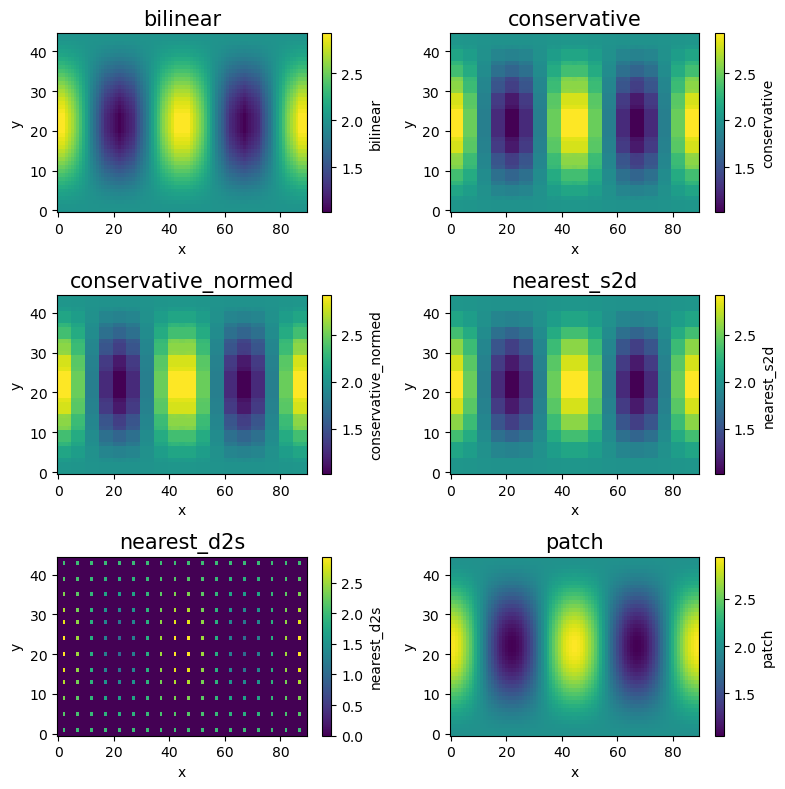

In [12]:
fig, axes = plt.subplots(3, 2, figsize=[8, 8])

for i, method in enumerate(method_list):
    ax = axes.flatten()[i]
    ds_fine[method].plot.pcolormesh(ax=ax)
    ax.set_title(method, fontsize=15)

plt.tight_layout()